<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />

# Worksheet 10.2 - Exploratory Data Analysis (EDA) With AI - Answers

In this brief lab, we're going to try some of the exploratory data analysis and feature engineering techniques we learned using AI.  As with the previous example, you will need an API key from OpenAI for these exercises.

We will be using Pandas and Pandas-AI (https://pandas-ai.readthedocs.io/en/latest/) for this lab. 

First, import the modules.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
llm = OpenAI(api_token="<YOUR TOKEN>")
pandas_ai = PandasAI(llm)
%matplotlib inline  

Next, we're going to read in the `dailybots.csv` file which we used in the DataFrame lab.

In [34]:
df = pd.read_csv('../data/dailybots.csv')
df['date'] = pd.to_datetime(df['date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      4969 non-null   datetime64[ns]
 1   botfam    4969 non-null   object        
 2   industry  4969 non-null   object        
 3   hosts     4969 non-null   int64         
 4   orgs      4969 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 194.2+ KB
None


#  Part One:  Which Five Bot Families Affected the Government the Most?
For part one, use PandasAI to answer the question: Which 5 bot families affected the government the most?

The syntax is:

```python
pandas_ai(<dataframe>, <question>)
```


In [36]:
pandas_ai(df, "Which 5 Bot Families Affected the Government the Most?")

botfam
ConfickerAB    28818
Necurs         12425
Sality          7466
Bedep           6183
Ramnit          4484
Name: hosts, dtype: int64

What answer did you get?  Is this correct?  How do you know?

You can verify your answer by running:

```python
print(pandas_ai.last_code_executed)
```

You can also view the prompt used to generate this data:
```python
print(pandas_ai.last_prompt)
```

Give it a try.

In [38]:
print(pandas_ai.last_code_executed)

df_government = df[df['industry'] == 'Government/Politics']
top_5_botfam = df_government.groupby('botfam')['hosts'].sum().nlargest(5)
top_5_botfam


In [39]:
print(pandas_ai.last_prompt)


Today is 2023-07-30.
You are provided with a pandas dataframe (df) with 4969 rows and 5 columns.
This is the metadata of the dataframe:
        date botfam             industry  hosts  orgs
0 2016-06-01  Bedep            Education    430    17
1 2016-06-01  Bedep  Healthcare/Wellness    184    19
2 2016-06-01  Bedep              Finance     42    19
3 2016-06-01  Bedep        Manufacturing    387    18
4 2016-06-01  Bedep  Government/Politics     42    18.

When asked about the data, your response should include a python code that describes the dataframe `df`.
Using the provided dataframe, df, return the python code and make sure to prefix the requested python code with <startCode> exactly and suffix the code with <endCode> exactly to get the answer to the following question:
Which 5 Bot Families Affected the Government the Most?


## Part Two:  Visualization
For this example, create a grouped bar chart which compares the number of hosts and organizations, grouped by bot family.

Note:  We're re-reading the CSV file here because the AI didn't seem to be able to figure out how to deal with the datetime column.

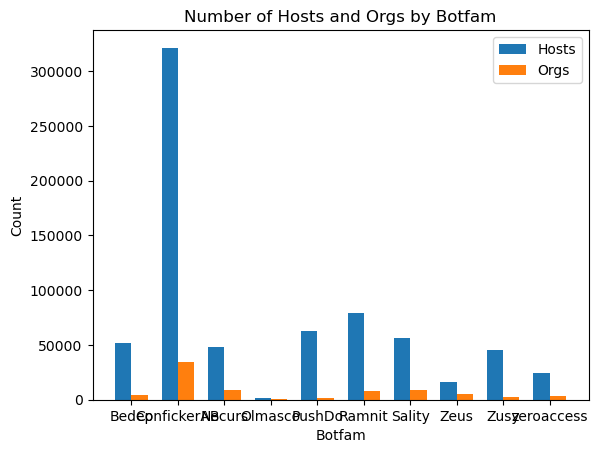

In [63]:
df = pd.read_csv('../data/dailybots.csv')
pandas_ai(df, "Create a grouped bar chart comparing the number of hosts and orgs, broken down by botfam.")

## Part Three:  Feature Engineering
In this final example we will read in the data from one of the DGA files we used and we're going to extract features from it. 

In [66]:
dga_df = pd.read_csv('../data/dga_data_small.csv')

In [67]:
pandas_ai.generate_features(dga_df)

,isDGA,domain,host,subclass,domain_length,num_digits,num_special_chars
0,dga,tyopcrkqgxcfm,tyopcrkqgxcfm.co.uk,cryptolocker,13,0,0
1,dga,72j5rn1l9mzleo6203v1ogenfl,72j5rn1l9mzleo6203v1ogenfl.org,gameoverdga,26,10,0
2,dga,thenrest,thenrest.net,nivdort,8,0,0
3,dga,15ihbm71utcnfa8dk1mmgoobl9,15ihbm71utcnfa8dk1mmgoobl9.org,gameoverdga,26,7,0
4,dga,x1d6ou7e7kofk60ayhq74x7e,x1d6ou7e7kofk60ayhq74x7e.net,gameoverdga,24,9,0
...,...,...,...,...,...,...,...
1995,legit,88ha,88ha.com,alexa,4,2,0
1996,legit,grooby,grooby.com,alexa,6,0,0
1997,legit,51zzl,51zzl.com,alexa,5,2,0
1998,legit,index-education,index-education.com,legit,15,0,1


How did it do?  Did it generate any interesting features?